### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

### US Health Insurance Dataset

In [2]:
# load dataset
df = pd.read_csv("data/ushealth.csv")

# Create x & y
x = df.drop("charges", axis=1)
y = df["charges"]

In [3]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [4]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [5]:
# Build our train and test sets (use random state to ensure same split as before for hyperparams experiment)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Identify the categorical and numeric columns
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]
ct = make_column_transformer((MinMaxScaler(), numeric_features),
                             (OneHotEncoder(handle_unknown='ignore'), categorical_features))

# transform the data using transformers
x_train_transformed = ct.fit_transform(x_train)
x_test_transformed = ct.transform(x_test)

In [6]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [7]:
x_train.shape, x_train_transformed.shape

((1003, 6), (1003, 11))

In [8]:
x_test_transformed.shape

(335, 11)

### Model Architecture

In [9]:
x_train_transformed.shape[1:]

(11,)

In [10]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 11, 100, 1 units)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(11, activation="relu", input_shape = x_train_transformed.shape[1:]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss= tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics= ['mae'])

# Fit the model for 100 epochs 
history = model.fit(x_train_transformed, y_train, validation_data=(x_test_transformed, y_test), epochs=2000) 

Epoch 1/2000
32/32 [==============================] - 1s 8ms/step - loss: 13267.6768 - mae: 13267.6768 - val_loss: 13277.1406 - val_mae: 13277.1406
Epoch 2/2000
32/32 [==============================] - 0s 2ms/step - loss: 13266.4141 - mae: 13266.4141 - val_loss: 13275.1406 - val_mae: 13275.1406
Epoch 3/2000
32/32 [==============================] - 0s 2ms/step - loss: 13262.9062 - mae: 13262.9062 - val_loss: 13269.3467 - val_mae: 13269.3467
Epoch 4/2000
32/32 [==============================] - 0s 2ms/step - loss: 13253.6055 - mae: 13253.6055 - val_loss: 13255.2090 - val_mae: 13255.2090
Epoch 5/2000
32/32 [==============================] - 0s 2ms/step - loss: 13233.3691 - mae: 13233.3691 - val_loss: 13227.1064 - val_mae: 13227.1064
Epoch 6/2000
32/32 [==============================] - 0s 1ms/step - loss: 13196.5400 - mae: 13196.5400 - val_loss: 13179.3242 - val_mae: 13179.3242
Epoch 7/2000
32/32 [==============================] - 0s 2ms/step - loss: 13137.5342 - mae: 13137.5342 - val_los

32/32 [==============================] - 0s 2ms/step - loss: 6892.8984 - mae: 6892.8984 - val_loss: 7077.8110 - val_mae: 7077.8110
Epoch 58/2000
32/32 [==============================] - 0s 2ms/step - loss: 6848.7642 - mae: 6848.7642 - val_loss: 7031.2222 - val_mae: 7031.2222
Epoch 59/2000
32/32 [==============================] - 0s 1ms/step - loss: 6803.0615 - mae: 6803.0615 - val_loss: 6985.3247 - val_mae: 6985.3247
Epoch 60/2000
32/32 [==============================] - 0s 1ms/step - loss: 6755.7344 - mae: 6755.7344 - val_loss: 6939.5498 - val_mae: 6939.5498
Epoch 61/2000
32/32 [==============================] - 0s 1ms/step - loss: 6707.5376 - mae: 6707.5376 - val_loss: 6889.0151 - val_mae: 6889.0151
Epoch 62/2000
32/32 [==============================] - 0s 1ms/step - loss: 6657.0635 - mae: 6657.0635 - val_loss: 6839.0278 - val_mae: 6839.0278
Epoch 63/2000
32/32 [==============================] - 0s 2ms/step - loss: 6606.7485 - mae: 6606.7485 - val_loss: 6787.1304 - val_mae: 6787.1304

32/32 [==============================] - 0s 2ms/step - loss: 3585.0542 - mae: 3585.0542 - val_loss: 3619.2415 - val_mae: 3619.2415
Epoch 114/2000
32/32 [==============================] - 0s 2ms/step - loss: 3579.5420 - mae: 3579.5420 - val_loss: 3615.6709 - val_mae: 3615.6709
Epoch 115/2000
32/32 [==============================] - 0s 2ms/step - loss: 3573.9006 - mae: 3573.9006 - val_loss: 3608.4648 - val_mae: 3608.4648
Epoch 116/2000
32/32 [==============================] - 0s 2ms/step - loss: 3568.4758 - mae: 3568.4758 - val_loss: 3601.0056 - val_mae: 3601.0056
Epoch 117/2000
32/32 [==============================] - 0s 2ms/step - loss: 3563.3604 - mae: 3563.3604 - val_loss: 3595.9082 - val_mae: 3595.9082
Epoch 118/2000
32/32 [==============================] - 0s 2ms/step - loss: 3558.5840 - mae: 3558.5840 - val_loss: 3584.9150 - val_mae: 3584.9150
Epoch 119/2000
32/32 [==============================] - 0s 2ms/step - loss: 3552.4656 - mae: 3552.4656 - val_loss: 3580.5359 - val_mae: 358

32/32 [==============================] - 0s 2ms/step - loss: 3302.6021 - mae: 3302.6021 - val_loss: 3190.2351 - val_mae: 3190.2351
Epoch 170/2000
32/32 [==============================] - 0s 2ms/step - loss: 3300.0186 - mae: 3300.0186 - val_loss: 3182.3115 - val_mae: 3182.3115
Epoch 171/2000
32/32 [==============================] - 0s 2ms/step - loss: 3297.5974 - mae: 3297.5974 - val_loss: 3174.9243 - val_mae: 3174.9243
Epoch 172/2000
32/32 [==============================] - 0s 2ms/step - loss: 3291.9785 - mae: 3291.9785 - val_loss: 3169.1443 - val_mae: 3169.1443
Epoch 173/2000
32/32 [==============================] - 0s 2ms/step - loss: 3288.7119 - mae: 3288.7119 - val_loss: 3159.9414 - val_mae: 3159.9414
Epoch 174/2000
32/32 [==============================] - 0s 2ms/step - loss: 3284.8960 - mae: 3284.8960 - val_loss: 3154.0105 - val_mae: 3154.0105
Epoch 175/2000
32/32 [==============================] - 0s 1ms/step - loss: 3281.8186 - mae: 3281.8186 - val_loss: 3147.0813 - val_mae: 314

32/32 [==============================] - 0s 2ms/step - loss: 3191.8704 - mae: 3191.8704 - val_loss: 2974.8215 - val_mae: 2974.8215
Epoch 226/2000
32/32 [==============================] - 0s 2ms/step - loss: 3189.7791 - mae: 3189.7791 - val_loss: 2970.4463 - val_mae: 2970.4463
Epoch 227/2000
32/32 [==============================] - 0s 2ms/step - loss: 3187.9087 - mae: 3187.9087 - val_loss: 2968.3452 - val_mae: 2968.3452
Epoch 228/2000
32/32 [==============================] - 0s 2ms/step - loss: 3188.0808 - mae: 3188.0808 - val_loss: 2968.1018 - val_mae: 2968.1018
Epoch 229/2000
32/32 [==============================] - 0s 2ms/step - loss: 3187.5762 - mae: 3187.5762 - val_loss: 2965.8345 - val_mae: 2965.8345
Epoch 230/2000
32/32 [==============================] - 0s 2ms/step - loss: 3186.1284 - mae: 3186.1284 - val_loss: 2963.6448 - val_mae: 2963.6448
Epoch 231/2000
32/32 [==============================] - 0s 2ms/step - loss: 3185.0146 - mae: 3185.0146 - val_loss: 2961.1240 - val_mae: 296

32/32 [==============================] - 0s 2ms/step - loss: 3176.2788 - mae: 3176.2788 - val_loss: 2952.8816 - val_mae: 2952.8816
Epoch 282/2000
32/32 [==============================] - 0s 2ms/step - loss: 3176.6084 - mae: 3176.6084 - val_loss: 2949.5645 - val_mae: 2949.5645
Epoch 283/2000
32/32 [==============================] - 0s 2ms/step - loss: 3175.1492 - mae: 3175.1492 - val_loss: 2950.1660 - val_mae: 2950.1660
Epoch 284/2000
32/32 [==============================] - 0s 2ms/step - loss: 3175.4426 - mae: 3175.4426 - val_loss: 2952.2710 - val_mae: 2952.2710
Epoch 285/2000
32/32 [==============================] - 0s 2ms/step - loss: 3175.3162 - mae: 3175.3162 - val_loss: 2949.0994 - val_mae: 2949.0994
Epoch 286/2000
32/32 [==============================] - 0s 2ms/step - loss: 3174.6487 - mae: 3174.6487 - val_loss: 2948.6348 - val_mae: 2948.6348
Epoch 287/2000
32/32 [==============================] - 0s 2ms/step - loss: 3176.0166 - mae: 3176.0166 - val_loss: 2949.0164 - val_mae: 294

32/32 [==============================] - 0s 2ms/step - loss: 3171.5674 - mae: 3171.5674 - val_loss: 2945.2759 - val_mae: 2945.2759
Epoch 338/2000
32/32 [==============================] - 0s 2ms/step - loss: 3172.3074 - mae: 3172.3074 - val_loss: 2946.8350 - val_mae: 2946.8350
Epoch 339/2000
32/32 [==============================] - 0s 1ms/step - loss: 3170.8948 - mae: 3170.8948 - val_loss: 2946.8948 - val_mae: 2946.8948
Epoch 340/2000
32/32 [==============================] - 0s 2ms/step - loss: 3171.2886 - mae: 3171.2886 - val_loss: 2947.1287 - val_mae: 2947.1287
Epoch 341/2000
32/32 [==============================] - 0s 2ms/step - loss: 3170.7344 - mae: 3170.7344 - val_loss: 2944.9790 - val_mae: 2944.9790
Epoch 342/2000
32/32 [==============================] - 0s 2ms/step - loss: 3170.8779 - mae: 3170.8779 - val_loss: 2944.7280 - val_mae: 2944.7280
Epoch 343/2000
32/32 [==============================] - 0s 2ms/step - loss: 3171.9038 - mae: 3171.9038 - val_loss: 2945.7798 - val_mae: 294

32/32 [==============================] - 0s 2ms/step - loss: 3169.4958 - mae: 3169.4958 - val_loss: 2944.0078 - val_mae: 2944.0078
Epoch 394/2000
32/32 [==============================] - 0s 2ms/step - loss: 3168.7231 - mae: 3168.7231 - val_loss: 2942.7400 - val_mae: 2942.7400
Epoch 395/2000
32/32 [==============================] - 0s 2ms/step - loss: 3168.2100 - mae: 3168.2100 - val_loss: 2944.0039 - val_mae: 2944.0039
Epoch 396/2000
32/32 [==============================] - 0s 2ms/step - loss: 3168.4507 - mae: 3168.4507 - val_loss: 2942.9451 - val_mae: 2942.9451
Epoch 397/2000
32/32 [==============================] - 0s 2ms/step - loss: 3167.2925 - mae: 3167.2925 - val_loss: 2944.4353 - val_mae: 2944.4353
Epoch 398/2000
32/32 [==============================] - 0s 2ms/step - loss: 3168.6914 - mae: 3168.6914 - val_loss: 2944.5278 - val_mae: 2944.5278
Epoch 399/2000
32/32 [==============================] - 0s 2ms/step - loss: 3167.6624 - mae: 3167.6624 - val_loss: 2943.4143 - val_mae: 294

32/32 [==============================] - 0s 1ms/step - loss: 3166.3992 - mae: 3166.3992 - val_loss: 2941.1609 - val_mae: 2941.1609
Epoch 450/2000
32/32 [==============================] - 0s 1ms/step - loss: 3165.5627 - mae: 3165.5627 - val_loss: 2942.6160 - val_mae: 2942.6160
Epoch 451/2000
32/32 [==============================] - 0s 2ms/step - loss: 3165.2673 - mae: 3165.2673 - val_loss: 2948.1899 - val_mae: 2948.1899
Epoch 452/2000
32/32 [==============================] - 0s 2ms/step - loss: 3168.1953 - mae: 3168.1953 - val_loss: 2940.8364 - val_mae: 2940.8364
Epoch 453/2000
32/32 [==============================] - 0s 2ms/step - loss: 3166.0276 - mae: 3166.0276 - val_loss: 2942.6780 - val_mae: 2942.6780
Epoch 454/2000
32/32 [==============================] - 0s 2ms/step - loss: 3165.6365 - mae: 3165.6365 - val_loss: 2942.9521 - val_mae: 2942.9521
Epoch 455/2000
32/32 [==============================] - 0s 2ms/step - loss: 3165.2410 - mae: 3165.2410 - val_loss: 2941.3823 - val_mae: 294

32/32 [==============================] - 0s 2ms/step - loss: 3164.6426 - mae: 3164.6426 - val_loss: 2940.4800 - val_mae: 2940.4800
Epoch 506/2000
32/32 [==============================] - 0s 2ms/step - loss: 3164.5371 - mae: 3164.5371 - val_loss: 2939.3335 - val_mae: 2939.3335
Epoch 507/2000
32/32 [==============================] - 0s 2ms/step - loss: 3164.5471 - mae: 3164.5471 - val_loss: 2939.8447 - val_mae: 2939.8447
Epoch 508/2000
32/32 [==============================] - 0s 2ms/step - loss: 3164.0481 - mae: 3164.0481 - val_loss: 2938.8425 - val_mae: 2938.8425
Epoch 509/2000
32/32 [==============================] - 0s 2ms/step - loss: 3163.5610 - mae: 3163.5610 - val_loss: 2941.1799 - val_mae: 2941.1799
Epoch 510/2000
32/32 [==============================] - 0s 2ms/step - loss: 3163.6941 - mae: 3163.6941 - val_loss: 2939.3643 - val_mae: 2939.3643
Epoch 511/2000
32/32 [==============================] - 0s 2ms/step - loss: 3163.9800 - mae: 3163.9800 - val_loss: 2939.3826 - val_mae: 293

32/32 [==============================] - 0s 2ms/step - loss: 3162.5586 - mae: 3162.5586 - val_loss: 2940.1934 - val_mae: 2940.1934
Epoch 562/2000
32/32 [==============================] - 0s 1ms/step - loss: 3162.3003 - mae: 3162.3003 - val_loss: 2940.4634 - val_mae: 2940.4634
Epoch 563/2000
32/32 [==============================] - 0s 2ms/step - loss: 3162.0725 - mae: 3162.0725 - val_loss: 2940.8462 - val_mae: 2940.8462
Epoch 564/2000
32/32 [==============================] - 0s 1ms/step - loss: 3163.1721 - mae: 3163.1721 - val_loss: 2941.6372 - val_mae: 2941.6372
Epoch 565/2000
32/32 [==============================] - 0s 2ms/step - loss: 3161.8972 - mae: 3161.8972 - val_loss: 2939.3508 - val_mae: 2939.3508
Epoch 566/2000
32/32 [==============================] - 0s 2ms/step - loss: 3161.7000 - mae: 3161.7000 - val_loss: 2939.2952 - val_mae: 2939.2952
Epoch 567/2000
32/32 [==============================] - 0s 2ms/step - loss: 3162.9529 - mae: 3162.9529 - val_loss: 2939.7393 - val_mae: 293

32/32 [==============================] - 0s 2ms/step - loss: 3159.4548 - mae: 3159.4548 - val_loss: 2940.5745 - val_mae: 2940.5745
Epoch 618/2000
32/32 [==============================] - 0s 2ms/step - loss: 3159.0601 - mae: 3159.0601 - val_loss: 2939.9973 - val_mae: 2939.9973
Epoch 619/2000
32/32 [==============================] - 0s 2ms/step - loss: 3159.7041 - mae: 3159.7041 - val_loss: 2942.9980 - val_mae: 2942.9980
Epoch 620/2000
32/32 [==============================] - 0s 2ms/step - loss: 3159.5696 - mae: 3159.5696 - val_loss: 2939.5906 - val_mae: 2939.5906
Epoch 621/2000
32/32 [==============================] - 0s 2ms/step - loss: 3159.3948 - mae: 3159.3948 - val_loss: 2940.3491 - val_mae: 2940.3491
Epoch 622/2000
32/32 [==============================] - 0s 2ms/step - loss: 3159.7300 - mae: 3159.7300 - val_loss: 2941.2112 - val_mae: 2941.2112
Epoch 623/2000
32/32 [==============================] - 0s 2ms/step - loss: 3158.8708 - mae: 3158.8708 - val_loss: 2939.5085 - val_mae: 293

32/32 [==============================] - 0s 2ms/step - loss: 3155.5872 - mae: 3155.5872 - val_loss: 2938.3318 - val_mae: 2938.3318
Epoch 674/2000
32/32 [==============================] - 0s 2ms/step - loss: 3154.3020 - mae: 3154.3020 - val_loss: 2939.2844 - val_mae: 2939.2844
Epoch 675/2000
32/32 [==============================] - 0s 2ms/step - loss: 3153.8967 - mae: 3153.8967 - val_loss: 2940.4521 - val_mae: 2940.4521
Epoch 676/2000
32/32 [==============================] - 0s 2ms/step - loss: 3155.0046 - mae: 3155.0046 - val_loss: 2937.9150 - val_mae: 2937.9150
Epoch 677/2000
32/32 [==============================] - 0s 2ms/step - loss: 3153.8108 - mae: 3153.8108 - val_loss: 2938.5938 - val_mae: 2938.5938
Epoch 678/2000
32/32 [==============================] - 0s 2ms/step - loss: 3153.8909 - mae: 3153.8909 - val_loss: 2938.3367 - val_mae: 2938.3367
Epoch 679/2000
32/32 [==============================] - 0s 2ms/step - loss: 3153.4199 - mae: 3153.4199 - val_loss: 2938.4363 - val_mae: 293

32/32 [==============================] - 0s 1ms/step - loss: 3146.3127 - mae: 3146.3127 - val_loss: 2935.3799 - val_mae: 2935.3799
Epoch 730/2000
32/32 [==============================] - 0s 1ms/step - loss: 3146.6516 - mae: 3146.6516 - val_loss: 2935.7686 - val_mae: 2935.7686
Epoch 731/2000
32/32 [==============================] - 0s 2ms/step - loss: 3146.3223 - mae: 3146.3223 - val_loss: 2935.2412 - val_mae: 2935.2412
Epoch 732/2000
32/32 [==============================] - 0s 1ms/step - loss: 3146.2053 - mae: 3146.2053 - val_loss: 2934.3628 - val_mae: 2934.3628
Epoch 733/2000
32/32 [==============================] - 0s 2ms/step - loss: 3146.4282 - mae: 3146.4282 - val_loss: 2934.7781 - val_mae: 2934.7781
Epoch 734/2000
32/32 [==============================] - 0s 2ms/step - loss: 3146.2556 - mae: 3146.2556 - val_loss: 2934.8528 - val_mae: 2934.8528
Epoch 735/2000
32/32 [==============================] - 0s 2ms/step - loss: 3145.1382 - mae: 3145.1382 - val_loss: 2937.2036 - val_mae: 293

32/32 [==============================] - 0s 2ms/step - loss: 3132.3293 - mae: 3132.3293 - val_loss: 2929.2339 - val_mae: 2929.2339
Epoch 786/2000
32/32 [==============================] - 0s 2ms/step - loss: 3131.7747 - mae: 3131.7747 - val_loss: 2928.2427 - val_mae: 2928.2427
Epoch 787/2000
32/32 [==============================] - 0s 1ms/step - loss: 3132.6853 - mae: 3132.6853 - val_loss: 2928.1365 - val_mae: 2928.1365
Epoch 788/2000
32/32 [==============================] - 0s 1ms/step - loss: 3131.8945 - mae: 3131.8945 - val_loss: 2930.5979 - val_mae: 2930.5979
Epoch 789/2000
32/32 [==============================] - 0s 2ms/step - loss: 3131.4758 - mae: 3131.4758 - val_loss: 2926.4634 - val_mae: 2926.4634
Epoch 790/2000
32/32 [==============================] - 0s 1ms/step - loss: 3131.3005 - mae: 3131.3005 - val_loss: 2928.2773 - val_mae: 2928.2773
Epoch 791/2000
32/32 [==============================] - 0s 1ms/step - loss: 3131.5786 - mae: 3131.5786 - val_loss: 2927.7209 - val_mae: 292

32/32 [==============================] - 0s 2ms/step - loss: 3115.3516 - mae: 3115.3516 - val_loss: 2919.1401 - val_mae: 2919.1401
Epoch 842/2000
32/32 [==============================] - 0s 2ms/step - loss: 3114.3738 - mae: 3114.3738 - val_loss: 2917.6699 - val_mae: 2917.6699
Epoch 843/2000
32/32 [==============================] - 0s 2ms/step - loss: 3114.8040 - mae: 3114.8040 - val_loss: 2917.4392 - val_mae: 2917.4392
Epoch 844/2000
32/32 [==============================] - 0s 2ms/step - loss: 3113.9321 - mae: 3113.9321 - val_loss: 2916.0615 - val_mae: 2916.0615
Epoch 845/2000
32/32 [==============================] - 0s 2ms/step - loss: 3113.9368 - mae: 3113.9368 - val_loss: 2914.8416 - val_mae: 2914.8416
Epoch 846/2000
32/32 [==============================] - 0s 2ms/step - loss: 3114.2502 - mae: 3114.2502 - val_loss: 2919.7720 - val_mae: 2919.7720
Epoch 847/2000
32/32 [==============================] - 0s 2ms/step - loss: 3115.5251 - mae: 3115.5251 - val_loss: 2914.9355 - val_mae: 291

32/32 [==============================] - 0s 1ms/step - loss: 3094.4924 - mae: 3094.4924 - val_loss: 2901.3916 - val_mae: 2901.3916
Epoch 898/2000
32/32 [==============================] - 0s 2ms/step - loss: 3093.2275 - mae: 3093.2275 - val_loss: 2900.3330 - val_mae: 2900.3330
Epoch 899/2000
32/32 [==============================] - 0s 2ms/step - loss: 3092.7258 - mae: 3092.7258 - val_loss: 2901.3672 - val_mae: 2901.3672
Epoch 900/2000
32/32 [==============================] - 0s 1ms/step - loss: 3092.3086 - mae: 3092.3086 - val_loss: 2900.3657 - val_mae: 2900.3657
Epoch 901/2000
32/32 [==============================] - 0s 1ms/step - loss: 3092.3984 - mae: 3092.3984 - val_loss: 2904.7869 - val_mae: 2904.7869
Epoch 902/2000
32/32 [==============================] - 0s 1ms/step - loss: 3091.8152 - mae: 3091.8152 - val_loss: 2900.2180 - val_mae: 2900.2180
Epoch 903/2000
32/32 [==============================] - 0s 1ms/step - loss: 3090.4348 - mae: 3090.4348 - val_loss: 2899.4727 - val_mae: 289

32/32 [==============================] - 0s 1ms/step - loss: 3057.1030 - mae: 3057.1030 - val_loss: 2870.9988 - val_mae: 2870.9988
Epoch 954/2000
32/32 [==============================] - 0s 1ms/step - loss: 3056.8169 - mae: 3056.8169 - val_loss: 2871.1426 - val_mae: 2871.1426
Epoch 955/2000
32/32 [==============================] - 0s 1ms/step - loss: 3054.6345 - mae: 3054.6345 - val_loss: 2871.2505 - val_mae: 2871.2505
Epoch 956/2000
32/32 [==============================] - 0s 1ms/step - loss: 3054.2429 - mae: 3054.2429 - val_loss: 2869.9260 - val_mae: 2869.9260
Epoch 957/2000
32/32 [==============================] - 0s 1ms/step - loss: 3052.6904 - mae: 3052.6904 - val_loss: 2870.1680 - val_mae: 2870.1680
Epoch 958/2000
32/32 [==============================] - 0s 1ms/step - loss: 3051.5938 - mae: 3051.5938 - val_loss: 2869.6802 - val_mae: 2869.6802
Epoch 959/2000
32/32 [==============================] - 0s 1ms/step - loss: 3050.3091 - mae: 3050.3091 - val_loss: 2867.9109 - val_mae: 286

32/32 [==============================] - 0s 2ms/step - loss: 2983.6350 - mae: 2983.6350 - val_loss: 2822.2795 - val_mae: 2822.2795
Epoch 1010/2000
32/32 [==============================] - 0s 2ms/step - loss: 2983.2302 - mae: 2983.2302 - val_loss: 2821.1379 - val_mae: 2821.1379
Epoch 1011/2000
32/32 [==============================] - 0s 2ms/step - loss: 2981.8667 - mae: 2981.8667 - val_loss: 2821.0881 - val_mae: 2821.0881
Epoch 1012/2000
32/32 [==============================] - 0s 2ms/step - loss: 2981.1147 - mae: 2981.1147 - val_loss: 2822.2280 - val_mae: 2822.2280
Epoch 1013/2000
32/32 [==============================] - 0s 1ms/step - loss: 2979.4207 - mae: 2979.4207 - val_loss: 2818.4031 - val_mae: 2818.4031
Epoch 1014/2000
32/32 [==============================] - 0s 1ms/step - loss: 2979.4080 - mae: 2979.4080 - val_loss: 2820.0564 - val_mae: 2820.0564
Epoch 1015/2000
32/32 [==============================] - 0s 1ms/step - loss: 2978.8264 - mae: 2978.8264 - val_loss: 2815.7673 - val_ma

Epoch 1065/2000
32/32 [==============================] - 0s 1ms/step - loss: 2913.4026 - mae: 2913.4026 - val_loss: 2767.8281 - val_mae: 2767.8281
Epoch 1066/2000
32/32 [==============================] - 0s 1ms/step - loss: 2911.6648 - mae: 2911.6648 - val_loss: 2767.3301 - val_mae: 2767.3301
Epoch 1067/2000
32/32 [==============================] - 0s 1ms/step - loss: 2910.7561 - mae: 2910.7561 - val_loss: 2767.9829 - val_mae: 2767.9829
Epoch 1068/2000
32/32 [==============================] - 0s 1ms/step - loss: 2911.1628 - mae: 2911.1628 - val_loss: 2764.1428 - val_mae: 2764.1428
Epoch 1069/2000
32/32 [==============================] - 0s 1ms/step - loss: 2908.8752 - mae: 2908.8752 - val_loss: 2763.8240 - val_mae: 2763.8240
Epoch 1070/2000
32/32 [==============================] - 0s 2ms/step - loss: 2907.4482 - mae: 2907.4482 - val_loss: 2762.8547 - val_mae: 2762.8547
Epoch 1071/2000
32/32 [==============================] - 0s 2ms/step - loss: 2907.2856 - mae: 2907.2856 - val_loss: 27

Epoch 1121/2000
32/32 [==============================] - 0s 2ms/step - loss: 2843.6541 - mae: 2843.6541 - val_loss: 2719.9832 - val_mae: 2719.9832
Epoch 1122/2000
32/32 [==============================] - 0s 2ms/step - loss: 2842.7844 - mae: 2842.7844 - val_loss: 2720.1226 - val_mae: 2720.1226
Epoch 1123/2000
32/32 [==============================] - 0s 2ms/step - loss: 2841.2708 - mae: 2841.2708 - val_loss: 2718.7917 - val_mae: 2718.7917
Epoch 1124/2000
32/32 [==============================] - 0s 2ms/step - loss: 2840.5378 - mae: 2840.5378 - val_loss: 2718.8328 - val_mae: 2718.8328
Epoch 1125/2000
32/32 [==============================] - 0s 1ms/step - loss: 2839.2876 - mae: 2839.2876 - val_loss: 2716.1672 - val_mae: 2716.1672
Epoch 1126/2000
32/32 [==============================] - 0s 1ms/step - loss: 2837.6404 - mae: 2837.6404 - val_loss: 2716.0930 - val_mae: 2716.0930
Epoch 1127/2000
32/32 [==============================] - 0s 1ms/step - loss: 2835.8547 - mae: 2835.8547 - val_loss: 27

Epoch 1177/2000
32/32 [==============================] - 0s 1ms/step - loss: 2767.1887 - mae: 2767.1887 - val_loss: 2666.2168 - val_mae: 2666.2168
Epoch 1178/2000
32/32 [==============================] - 0s 1ms/step - loss: 2767.8447 - mae: 2767.8447 - val_loss: 2664.3589 - val_mae: 2664.3589
Epoch 1179/2000
32/32 [==============================] - 0s 2ms/step - loss: 2764.5044 - mae: 2764.5044 - val_loss: 2663.5466 - val_mae: 2663.5466
Epoch 1180/2000
32/32 [==============================] - 0s 1ms/step - loss: 2761.9978 - mae: 2761.9978 - val_loss: 2665.1448 - val_mae: 2665.1448
Epoch 1181/2000
32/32 [==============================] - 0s 1ms/step - loss: 2761.6865 - mae: 2761.6865 - val_loss: 2662.4175 - val_mae: 2662.4175
Epoch 1182/2000
32/32 [==============================] - 0s 1ms/step - loss: 2759.5015 - mae: 2759.5015 - val_loss: 2662.3083 - val_mae: 2662.3083
Epoch 1183/2000
32/32 [==============================] - 0s 1ms/step - loss: 2758.2400 - mae: 2758.2400 - val_loss: 26

Epoch 1233/2000
32/32 [==============================] - 0s 1ms/step - loss: 2681.2200 - mae: 2681.2200 - val_loss: 2603.0076 - val_mae: 2603.0076
Epoch 1234/2000
32/32 [==============================] - 0s 1ms/step - loss: 2679.3562 - mae: 2679.3562 - val_loss: 2600.1665 - val_mae: 2600.1665
Epoch 1235/2000
32/32 [==============================] - 0s 1ms/step - loss: 2676.0947 - mae: 2676.0947 - val_loss: 2598.8003 - val_mae: 2598.8003
Epoch 1236/2000
32/32 [==============================] - 0s 1ms/step - loss: 2674.9348 - mae: 2674.9348 - val_loss: 2598.2468 - val_mae: 2598.2468
Epoch 1237/2000
32/32 [==============================] - 0s 1ms/step - loss: 2675.8391 - mae: 2675.8391 - val_loss: 2596.0776 - val_mae: 2596.0776
Epoch 1238/2000
32/32 [==============================] - 0s 1ms/step - loss: 2671.6428 - mae: 2671.6428 - val_loss: 2594.2268 - val_mae: 2594.2268
Epoch 1239/2000
32/32 [==============================] - 0s 1ms/step - loss: 2670.4133 - mae: 2670.4133 - val_loss: 25

Epoch 1289/2000
32/32 [==============================] - 0s 1ms/step - loss: 2585.5818 - mae: 2585.5818 - val_loss: 2524.4470 - val_mae: 2524.4470
Epoch 1290/2000
32/32 [==============================] - 0s 1ms/step - loss: 2584.5947 - mae: 2584.5947 - val_loss: 2524.3865 - val_mae: 2524.3865
Epoch 1291/2000
32/32 [==============================] - 0s 1ms/step - loss: 2582.0884 - mae: 2582.0884 - val_loss: 2522.4055 - val_mae: 2522.4055
Epoch 1292/2000
32/32 [==============================] - 0s 1ms/step - loss: 2581.4153 - mae: 2581.4153 - val_loss: 2521.1040 - val_mae: 2521.1040
Epoch 1293/2000
32/32 [==============================] - 0s 1ms/step - loss: 2578.9126 - mae: 2578.9126 - val_loss: 2518.8784 - val_mae: 2518.8784
Epoch 1294/2000
32/32 [==============================] - 0s 1ms/step - loss: 2578.6951 - mae: 2578.6951 - val_loss: 2519.3936 - val_mae: 2519.3936
Epoch 1295/2000
32/32 [==============================] - 0s 1ms/step - loss: 2575.0071 - mae: 2575.0071 - val_loss: 25

Epoch 1345/2000
32/32 [==============================] - 0s 1ms/step - loss: 2487.7273 - mae: 2487.7273 - val_loss: 2443.2371 - val_mae: 2443.2371
Epoch 1346/2000
32/32 [==============================] - 0s 1ms/step - loss: 2484.6938 - mae: 2484.6938 - val_loss: 2441.6550 - val_mae: 2441.6550
Epoch 1347/2000
32/32 [==============================] - 0s 1ms/step - loss: 2482.2385 - mae: 2482.2385 - val_loss: 2440.2361 - val_mae: 2440.2361
Epoch 1348/2000
32/32 [==============================] - 0s 1ms/step - loss: 2481.7542 - mae: 2481.7542 - val_loss: 2437.9927 - val_mae: 2437.9927
Epoch 1349/2000
32/32 [==============================] - 0s 1ms/step - loss: 2479.8774 - mae: 2479.8774 - val_loss: 2437.2852 - val_mae: 2437.2852
Epoch 1350/2000
32/32 [==============================] - 0s 1ms/step - loss: 2477.3518 - mae: 2477.3518 - val_loss: 2435.4263 - val_mae: 2435.4263
Epoch 1351/2000
32/32 [==============================] - 0s 1ms/step - loss: 2475.7058 - mae: 2475.7058 - val_loss: 24

Epoch 1401/2000
32/32 [==============================] - 0s 2ms/step - loss: 2391.5981 - mae: 2391.5981 - val_loss: 2354.3833 - val_mae: 2354.3833
Epoch 1402/2000
32/32 [==============================] - 0s 2ms/step - loss: 2389.6230 - mae: 2389.6230 - val_loss: 2353.2729 - val_mae: 2353.2729
Epoch 1403/2000
32/32 [==============================] - 0s 2ms/step - loss: 2388.7317 - mae: 2388.7317 - val_loss: 2352.0945 - val_mae: 2352.0945
Epoch 1404/2000
32/32 [==============================] - 0s 2ms/step - loss: 2388.4656 - mae: 2388.4656 - val_loss: 2349.7744 - val_mae: 2349.7744
Epoch 1405/2000
32/32 [==============================] - 0s 1ms/step - loss: 2386.0139 - mae: 2386.0139 - val_loss: 2348.6033 - val_mae: 2348.6033
Epoch 1406/2000
32/32 [==============================] - 0s 2ms/step - loss: 2385.8069 - mae: 2385.8069 - val_loss: 2346.9226 - val_mae: 2346.9226
Epoch 1407/2000
32/32 [==============================] - 0s 1ms/step - loss: 2383.2166 - mae: 2383.2166 - val_loss: 23

Epoch 1457/2000
32/32 [==============================] - 0s 2ms/step - loss: 2312.1257 - mae: 2312.1257 - val_loss: 2276.6855 - val_mae: 2276.6855
Epoch 1458/2000
32/32 [==============================] - 0s 3ms/step - loss: 2310.3381 - mae: 2310.3381 - val_loss: 2276.2588 - val_mae: 2276.2588
Epoch 1459/2000
32/32 [==============================] - 0s 2ms/step - loss: 2309.8337 - mae: 2309.8337 - val_loss: 2274.2231 - val_mae: 2274.2231
Epoch 1460/2000
32/32 [==============================] - 0s 2ms/step - loss: 2309.5244 - mae: 2309.5244 - val_loss: 2273.1521 - val_mae: 2273.1521
Epoch 1461/2000
32/32 [==============================] - 0s 3ms/step - loss: 2309.2300 - mae: 2309.2300 - val_loss: 2272.2961 - val_mae: 2272.2961
Epoch 1462/2000
32/32 [==============================] - 0s 3ms/step - loss: 2306.6663 - mae: 2306.6663 - val_loss: 2270.6680 - val_mae: 2270.6680
Epoch 1463/2000
32/32 [==============================] - 0s 1ms/step - loss: 2304.6438 - mae: 2304.6438 - val_loss: 22

Epoch 1513/2000
32/32 [==============================] - 0s 2ms/step - loss: 2251.5276 - mae: 2251.5276 - val_loss: 2208.2380 - val_mae: 2208.2380
Epoch 1514/2000
32/32 [==============================] - 0s 2ms/step - loss: 2250.7722 - mae: 2250.7722 - val_loss: 2205.8147 - val_mae: 2205.8147
Epoch 1515/2000
32/32 [==============================] - 0s 2ms/step - loss: 2248.9136 - mae: 2248.9136 - val_loss: 2205.1619 - val_mae: 2205.1619
Epoch 1516/2000
32/32 [==============================] - 0s 2ms/step - loss: 2248.8660 - mae: 2248.8660 - val_loss: 2205.0969 - val_mae: 2205.0969
Epoch 1517/2000
32/32 [==============================] - 0s 2ms/step - loss: 2248.6040 - mae: 2248.6040 - val_loss: 2203.2087 - val_mae: 2203.2087
Epoch 1518/2000
32/32 [==============================] - 0s 2ms/step - loss: 2249.5374 - mae: 2249.5374 - val_loss: 2206.7979 - val_mae: 2206.7979
Epoch 1519/2000
32/32 [==============================] - 0s 1ms/step - loss: 2247.8660 - mae: 2247.8660 - val_loss: 22

Epoch 1569/2000
32/32 [==============================] - 0s 1ms/step - loss: 2195.3025 - mae: 2195.3025 - val_loss: 2143.0896 - val_mae: 2143.0896
Epoch 1570/2000
32/32 [==============================] - 0s 1ms/step - loss: 2194.4468 - mae: 2194.4468 - val_loss: 2140.9514 - val_mae: 2140.9514
Epoch 1571/2000
32/32 [==============================] - 0s 1ms/step - loss: 2193.7822 - mae: 2193.7822 - val_loss: 2142.0139 - val_mae: 2142.0139
Epoch 1572/2000
32/32 [==============================] - 0s 1ms/step - loss: 2193.4258 - mae: 2193.4258 - val_loss: 2141.7368 - val_mae: 2141.7368
Epoch 1573/2000
32/32 [==============================] - 0s 1ms/step - loss: 2192.7815 - mae: 2192.7815 - val_loss: 2138.9995 - val_mae: 2138.9995
Epoch 1574/2000
32/32 [==============================] - 0s 1ms/step - loss: 2190.5081 - mae: 2190.5081 - val_loss: 2136.4939 - val_mae: 2136.4939
Epoch 1575/2000
32/32 [==============================] - 0s 1ms/step - loss: 2190.3005 - mae: 2190.3005 - val_loss: 21

Epoch 1625/2000
32/32 [==============================] - 0s 1ms/step - loss: 2142.6494 - mae: 2142.6494 - val_loss: 2080.3159 - val_mae: 2080.3159
Epoch 1626/2000
32/32 [==============================] - 0s 1ms/step - loss: 2141.1226 - mae: 2141.1226 - val_loss: 2078.9866 - val_mae: 2078.9866
Epoch 1627/2000
32/32 [==============================] - 0s 1ms/step - loss: 2140.9529 - mae: 2140.9529 - val_loss: 2078.1160 - val_mae: 2078.1160
Epoch 1628/2000
32/32 [==============================] - 0s 1ms/step - loss: 2139.9370 - mae: 2139.9370 - val_loss: 2076.8896 - val_mae: 2076.8896
Epoch 1629/2000
32/32 [==============================] - 0s 1ms/step - loss: 2139.1013 - mae: 2139.1013 - val_loss: 2075.4634 - val_mae: 2075.4634
Epoch 1630/2000
32/32 [==============================] - 0s 1ms/step - loss: 2137.5146 - mae: 2137.5146 - val_loss: 2074.7051 - val_mae: 2074.7051
Epoch 1631/2000
32/32 [==============================] - 0s 1ms/step - loss: 2137.1038 - mae: 2137.1038 - val_loss: 20

Epoch 1681/2000
32/32 [==============================] - 0s 1ms/step - loss: 2094.0586 - mae: 2094.0586 - val_loss: 2015.5868 - val_mae: 2015.5868
Epoch 1682/2000
32/32 [==============================] - 0s 1ms/step - loss: 2093.0063 - mae: 2093.0063 - val_loss: 2014.3507 - val_mae: 2014.3507
Epoch 1683/2000
32/32 [==============================] - 0s 1ms/step - loss: 2091.9207 - mae: 2091.9207 - val_loss: 2012.8906 - val_mae: 2012.8906
Epoch 1684/2000
32/32 [==============================] - 0s 1ms/step - loss: 2090.8804 - mae: 2090.8804 - val_loss: 2011.7214 - val_mae: 2011.7214
Epoch 1685/2000
32/32 [==============================] - 0s 2ms/step - loss: 2089.4734 - mae: 2089.4734 - val_loss: 2010.1592 - val_mae: 2010.1592
Epoch 1686/2000
32/32 [==============================] - 0s 1ms/step - loss: 2089.1538 - mae: 2089.1538 - val_loss: 2011.0675 - val_mae: 2011.0675
Epoch 1687/2000
32/32 [==============================] - 0s 1ms/step - loss: 2089.4492 - mae: 2089.4492 - val_loss: 20

Epoch 1737/2000
32/32 [==============================] - 0s 1ms/step - loss: 2054.9780 - mae: 2054.9780 - val_loss: 1956.0724 - val_mae: 1956.0724
Epoch 1738/2000
32/32 [==============================] - 0s 1ms/step - loss: 2054.5139 - mae: 2054.5139 - val_loss: 1956.0381 - val_mae: 1956.0381
Epoch 1739/2000
32/32 [==============================] - 0s 1ms/step - loss: 2055.4187 - mae: 2055.4187 - val_loss: 1954.1233 - val_mae: 1954.1233
Epoch 1740/2000
32/32 [==============================] - 0s 1ms/step - loss: 2054.0493 - mae: 2054.0493 - val_loss: 1953.3527 - val_mae: 1953.3527
Epoch 1741/2000
32/32 [==============================] - 0s 1ms/step - loss: 2053.6116 - mae: 2053.6116 - val_loss: 1952.0967 - val_mae: 1952.0967
Epoch 1742/2000
32/32 [==============================] - 0s 1ms/step - loss: 2052.0493 - mae: 2052.0493 - val_loss: 1950.3834 - val_mae: 1950.3834
Epoch 1743/2000
32/32 [==============================] - 0s 1ms/step - loss: 2051.8491 - mae: 2051.8491 - val_loss: 19

Epoch 1793/2000
32/32 [==============================] - 0s 1ms/step - loss: 2024.9087 - mae: 2024.9087 - val_loss: 1901.2228 - val_mae: 1901.2228
Epoch 1794/2000
32/32 [==============================] - 0s 1ms/step - loss: 2024.5049 - mae: 2024.5049 - val_loss: 1900.7273 - val_mae: 1900.7273
Epoch 1795/2000
32/32 [==============================] - 0s 1ms/step - loss: 2024.0345 - mae: 2024.0345 - val_loss: 1900.6608 - val_mae: 1900.6608
Epoch 1796/2000
32/32 [==============================] - 0s 1ms/step - loss: 2023.6068 - mae: 2023.6068 - val_loss: 1899.0480 - val_mae: 1899.0480
Epoch 1797/2000
32/32 [==============================] - 0s 1ms/step - loss: 2022.5184 - mae: 2022.5184 - val_loss: 1898.5396 - val_mae: 1898.5396
Epoch 1798/2000
32/32 [==============================] - 0s 1ms/step - loss: 2021.8782 - mae: 2021.8782 - val_loss: 1897.7197 - val_mae: 1897.7197
Epoch 1799/2000
32/32 [==============================] - 0s 1ms/step - loss: 2021.7615 - mae: 2021.7615 - val_loss: 18

Epoch 1849/2000
32/32 [==============================] - 0s 1ms/step - loss: 2004.2047 - mae: 2004.2047 - val_loss: 1865.8345 - val_mae: 1865.8345
Epoch 1850/2000
32/32 [==============================] - 0s 1ms/step - loss: 2003.3167 - mae: 2003.3167 - val_loss: 1865.1429 - val_mae: 1865.1429
Epoch 1851/2000
32/32 [==============================] - 0s 1ms/step - loss: 2003.2250 - mae: 2003.2250 - val_loss: 1865.2711 - val_mae: 1865.2711
Epoch 1852/2000
32/32 [==============================] - 0s 1ms/step - loss: 2006.2883 - mae: 2006.2883 - val_loss: 1867.3806 - val_mae: 1867.3806
Epoch 1853/2000
32/32 [==============================] - 0s 1ms/step - loss: 2005.5717 - mae: 2005.5717 - val_loss: 1865.2970 - val_mae: 1865.2970
Epoch 1854/2000
32/32 [==============================] - 0s 1ms/step - loss: 2002.2507 - mae: 2002.2507 - val_loss: 1864.9301 - val_mae: 1864.9301
Epoch 1855/2000
32/32 [==============================] - 0s 1ms/step - loss: 2001.5306 - mae: 2001.5306 - val_loss: 18

Epoch 1905/2000
32/32 [==============================] - 0s 1ms/step - loss: 1993.5640 - mae: 1993.5640 - val_loss: 1844.6578 - val_mae: 1844.6578
Epoch 1906/2000
32/32 [==============================] - 0s 1ms/step - loss: 1994.9904 - mae: 1994.9904 - val_loss: 1842.7338 - val_mae: 1842.7338
Epoch 1907/2000
32/32 [==============================] - 0s 1ms/step - loss: 1993.0468 - mae: 1993.0468 - val_loss: 1843.0049 - val_mae: 1843.0049
Epoch 1908/2000
32/32 [==============================] - 0s 1ms/step - loss: 1991.8207 - mae: 1991.8207 - val_loss: 1842.9353 - val_mae: 1842.9353
Epoch 1909/2000
32/32 [==============================] - 0s 1ms/step - loss: 1992.9529 - mae: 1992.9529 - val_loss: 1842.1462 - val_mae: 1842.1462
Epoch 1910/2000
32/32 [==============================] - 0s 1ms/step - loss: 1992.0942 - mae: 1992.0942 - val_loss: 1842.5840 - val_mae: 1842.5840
Epoch 1911/2000
32/32 [==============================] - 0s 1ms/step - loss: 1992.5624 - mae: 1992.5624 - val_loss: 18

Epoch 1961/2000
32/32 [==============================] - 0s 1ms/step - loss: 1984.2783 - mae: 1984.2783 - val_loss: 1832.4884 - val_mae: 1832.4884
Epoch 1962/2000
32/32 [==============================] - 0s 1ms/step - loss: 1984.5813 - mae: 1984.5813 - val_loss: 1833.5198 - val_mae: 1833.5198
Epoch 1963/2000
32/32 [==============================] - 0s 1ms/step - loss: 1985.0985 - mae: 1985.0985 - val_loss: 1832.6279 - val_mae: 1832.6279
Epoch 1964/2000
32/32 [==============================] - 0s 1ms/step - loss: 1984.5758 - mae: 1984.5758 - val_loss: 1833.1920 - val_mae: 1833.1920
Epoch 1965/2000
32/32 [==============================] - 0s 1ms/step - loss: 1984.1754 - mae: 1984.1754 - val_loss: 1834.2440 - val_mae: 1834.2440
Epoch 1966/2000
32/32 [==============================] - 0s 1ms/step - loss: 1984.8887 - mae: 1984.8887 - val_loss: 1831.9247 - val_mae: 1831.9247
Epoch 1967/2000
32/32 [==============================] - 0s 1ms/step - loss: 1983.7797 - mae: 1983.7797 - val_loss: 18

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 100)               1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,433
Trainable params: 1,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
y_predicted = model.predict(x_test_transformed)
y_predicted

11/11 [==============================] - 0s 601us/step


array([[ 9112.778 ],
       [ 5297.144 ],
       [32019.658 ],
       [ 9318.088 ],
       [27904.082 ],
       [ 4565.3213],
       [ 2075.2844],
       [14155.562 ],
       [ 3738.3591],
       [10279.015 ],
       [19837.904 ],
       [ 7204.9785],
       [ 3917.1838],
       [50851.84  ],
       [53288.992 ],
       [45994.41  ],
       [ 9814.629 ],
       [43102.57  ],
       [ 8257.184 ],
       [26325.914 ],
       [ 5111.7246],
       [ 7408.6763],
       [ 1262.463 ],
       [ 2819.7878],
       [11076.87  ],
       [10881.1045],
       [12664.368 ],
       [ 5187.1465],
       [ 9752.757 ],
       [ 1136.4686],
       [ 8234.11  ],
       [11873.46  ],
       [ 2019.9954],
       [ 5648.622 ],
       [ 2912.4421],
       [ 7485.577 ],
       [ 2605.8984],
       [ 7302.247 ],
       [24020.76  ],
       [37350.516 ],
       [ 4664.4165],
       [ 2664.2559],
       [11696.437 ],
       [12156.415 ],
       [ 4910.7603],
       [12366.237 ],
       [ 3621.5107],
       [ 4442

In [13]:
# Check the tensor shapes
y_test.shape, y_predicted.shape

((335,), (335, 1))

In [14]:
# Shape after squeeze()
y_predicted.squeeze().shape

(335,)

In [15]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_predicted.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1830.7843>

In [16]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_predicted.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=22099688.0>

In [17]:
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=1830.7843>,
 <tf.Tensor: shape=(), dtype=float32, numpy=22099688.0>)

<Axes: >

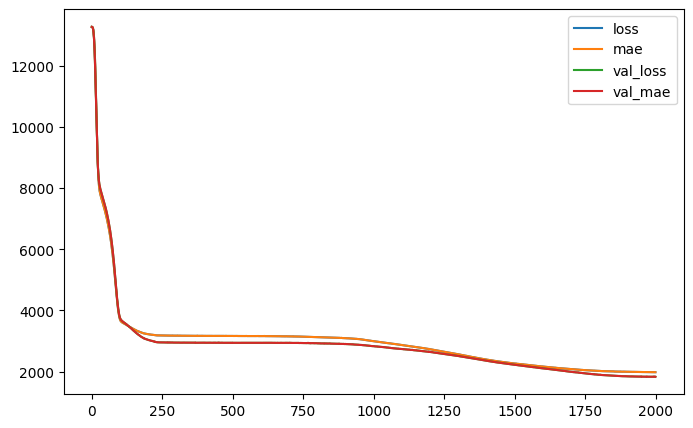

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

<Axes: >

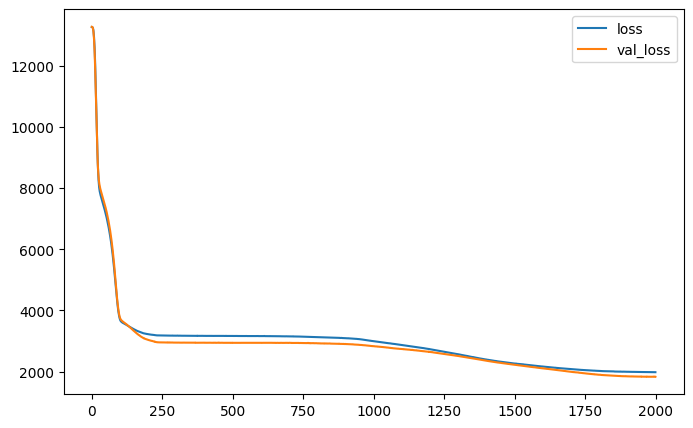

In [19]:
(pd.DataFrame(history.history).loc[:, ['loss', 'val_loss']]).plot(figsize=(8, 5))

#### Note:

There is very less improvement nearly around  epochs. We can stop the epochs using early stopping to get quick overview of how sharp the model will have reductio in loss / val_loss etc

In [21]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,val_loss,val_mae
1995,1980.324951,1980.324951,1830.817749,1830.817749
1996,1980.065063,1980.065063,1830.883057,1830.883057
1997,1980.163818,1980.163818,1835.966431,1835.966431
1998,1980.877197,1980.877197,1832.653320,1832.653320
1999,1980.002563,1980.002563,1830.784180,1830.784180


Note: last values at 2k epochs, lets compare it with the values that we get by earlly stopping

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience = 10, min_delta=.01,)

In [26]:
# saving best model weights observed during the epochs within early stopping
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('data/best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [27]:
# Set random seed
tf.random.set_seed(43)

# Build the model (3 layers, 11, 100, 1 units)
model_es = tf.keras.Sequential([
        tf.keras.layers.Dense(11, activation="relu", input_shape = x_train_transformed.shape[1:]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)])

# Compile the model
model_es.compile(loss= tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics= ['mae'])

# Fit the model for 100 epochs 
history_es = model_es.fit(x_train_transformed, y_train, validation_data=(x_test_transformed, y_test), epochs=2000,
                       callbacks=[early_stopping, model_checkpoint], verbose=1) 

Epoch 1/2000
 1/32 [..............................] - ETA: 10s - loss: 14668.8008 - mae: 14668.8008
Epoch 1: val_loss improved from inf to 13276.34961, saving model to data\best_model.h5
32/32 [==============================] - 0s 5ms/step - loss: 13267.3145 - mae: 13267.3145 - val_loss: 13276.3496 - val_mae: 13276.3496
Epoch 2/2000
 1/32 [..............................] - ETA: 0s - loss: 11206.2168 - mae: 11206.2168
Epoch 2: val_loss improved from 13276.34961 to 13272.89062, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 13265.0879 - mae: 13265.0879 - val_loss: 13272.8906 - val_mae: 13272.8906
Epoch 3/2000
 1/32 [..............................] - ETA: 0s - loss: 10276.3848 - mae: 10276.3848
Epoch 3: val_loss improved from 13272.89062 to 13264.56836, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 13259.6855 - mae: 13259.6855 - val_loss: 13264.5684 - val_mae: 13264.5684
Epoch 4/2000
 1/32 [

Epoch 26/2000
 1/32 [..............................] - ETA: 0s - loss: 7217.8604 - mae: 7217.8604
Epoch 26: val_loss improved from 8341.73828 to 8267.33105, saving model to data\best_model.h5
32/32 [==============================] - 0s 3ms/step - loss: 8105.5298 - mae: 8105.5298 - val_loss: 8267.3311 - val_mae: 8267.3311
Epoch 27/2000
 1/32 [..............................] - ETA: 0s - loss: 7602.7456 - mae: 7602.7456
Epoch 27: val_loss improved from 8267.33105 to 8202.48145, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 8033.3169 - mae: 8033.3169 - val_loss: 8202.4814 - val_mae: 8202.4814
Epoch 28/2000
 1/32 [..............................] - ETA: 0s - loss: 8422.7451 - mae: 8422.7451
Epoch 28: val_loss improved from 8202.48145 to 8154.06787, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 7979.1118 - mae: 7979.1123 - val_loss: 8154.0679 - val_mae: 8154.0679
Epoch 29/2000
 1/32 [..........

32/32 [==============================] - 0s 2ms/step - loss: 7185.4365 - mae: 7185.4365 - val_loss: 7371.8789 - val_mae: 7371.8789
Epoch 52/2000
 1/32 [..............................] - ETA: 0s - loss: 4761.7236 - mae: 4761.7236
Epoch 52: val_loss improved from 7371.87891 to 7332.00977, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 7147.2495 - mae: 7147.2495 - val_loss: 7332.0098 - val_mae: 7332.0098
Epoch 53/2000
 1/32 [..............................] - ETA: 0s - loss: 9750.3291 - mae: 9750.3291
Epoch 53: val_loss improved from 7332.00977 to 7289.46777, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 7104.5820 - mae: 7104.5820 - val_loss: 7289.4678 - val_mae: 7289.4678
Epoch 54/2000
 1/32 [..............................] - ETA: 0s - loss: 7722.7363 - mae: 7722.7363
Epoch 54: val_loss improved from 7289.46777 to 7247.73975, saving model to data\best_model.h5
32/32 [========================

Epoch 77/2000
 1/32 [..............................] - ETA: 0s - loss: 7367.8921 - mae: 7367.8921
Epoch 77: val_loss improved from 5836.67432 to 5740.97852, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 5583.4590 - mae: 5583.4590 - val_loss: 5740.9785 - val_mae: 5740.9785
Epoch 78/2000
 1/32 [..............................] - ETA: 0s - loss: 4959.2158 - mae: 4959.2158
Epoch 78: val_loss improved from 5740.97852 to 5640.65234, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 5489.9326 - mae: 5489.9326 - val_loss: 5640.6523 - val_mae: 5640.6523
Epoch 79/2000
 1/32 [..............................] - ETA: 0s - loss: 5988.8066 - mae: 5988.8066
Epoch 79: val_loss improved from 5640.65234 to 5540.98340, saving model to data\best_model.h5
32/32 [==============================] - 0s 3ms/step - loss: 5392.8208 - mae: 5392.8208 - val_loss: 5540.9834 - val_mae: 5540.9834
Epoch 80/2000
 1/32 [..........

32/32 [==============================] - 0s 2ms/step - loss: 3666.2769 - mae: 3666.2769 - val_loss: 3718.6082 - val_mae: 3718.6082
Epoch 103/2000
 1/32 [..............................] - ETA: 0s - loss: 2596.1250 - mae: 2596.1250
Epoch 103: val_loss improved from 3718.60815 to 3699.08252, saving model to data\best_model.h5
32/32 [==============================] - 0s 3ms/step - loss: 3648.7361 - mae: 3648.7361 - val_loss: 3699.0825 - val_mae: 3699.0825
Epoch 104/2000
 1/32 [..............................] - ETA: 0s - loss: 3887.7063 - mae: 3887.7063
Epoch 104: val_loss improved from 3699.08252 to 3683.52808, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3632.7681 - mae: 3632.7681 - val_loss: 3683.5281 - val_mae: 3683.5281
Epoch 105/2000
 1/32 [..............................] - ETA: 0s - loss: 2777.9402 - mae: 2777.9402
Epoch 105: val_loss improved from 3683.52808 to 3669.20825, saving model to data\best_model.h5
32/32 [==================

Epoch 128/2000
 1/32 [..............................] - ETA: 0s - loss: 3836.9480 - mae: 3836.9480
Epoch 128: val_loss improved from 3476.18628 to 3466.83667, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3478.7258 - mae: 3478.7258 - val_loss: 3466.8367 - val_mae: 3466.8367
Epoch 129/2000
 1/32 [..............................] - ETA: 0s - loss: 4629.2124 - mae: 4629.2124
Epoch 129: val_loss improved from 3466.83667 to 3461.88916, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3471.4546 - mae: 3471.4546 - val_loss: 3461.8892 - val_mae: 3461.8892
Epoch 130/2000
 1/32 [..............................] - ETA: 0s - loss: 3327.0254 - mae: 3327.0254
Epoch 130: val_loss improved from 3461.88916 to 3453.46606, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3466.7146 - mae: 3466.7146 - val_loss: 3453.4661 - val_mae: 3453.4661
Epoch 131/2000
 1/32 [...

 1/32 [..............................] - ETA: 0s - loss: 3283.6118 - mae: 3283.6118
Epoch 153: val_loss improved from 3258.35107 to 3251.67236, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3342.8193 - mae: 3342.8193 - val_loss: 3251.6724 - val_mae: 3251.6724
Epoch 154/2000
 1/32 [..............................] - ETA: 0s - loss: 1628.6512 - mae: 1628.6512
Epoch 154: val_loss improved from 3251.67236 to 3243.57275, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3337.9983 - mae: 3337.9983 - val_loss: 3243.5728 - val_mae: 3243.5728
Epoch 155/2000
 1/32 [..............................] - ETA: 0s - loss: 3838.8887 - mae: 3838.8887
Epoch 155: val_loss improved from 3243.57275 to 3236.40674, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3332.0981 - mae: 3332.0981 - val_loss: 3236.4067 - val_mae: 3236.4067
Epoch 156/2000
 1/32 [..................

 1/32 [..............................] - ETA: 0s - loss: 2818.9724 - mae: 2818.9724
Epoch 178: val_loss improved from 3088.69702 to 3081.95728, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3247.7407 - mae: 3247.7407 - val_loss: 3081.9573 - val_mae: 3081.9573
Epoch 179/2000
 1/32 [..............................] - ETA: 0s - loss: 3456.0991 - mae: 3456.0991
Epoch 179: val_loss improved from 3081.95728 to 3076.81982, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3243.5723 - mae: 3243.5723 - val_loss: 3076.8198 - val_mae: 3076.8198
Epoch 180/2000
 1/32 [..............................] - ETA: 0s - loss: 3343.5728 - mae: 3343.5728
Epoch 180: val_loss improved from 3076.81982 to 3075.78101, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3241.5732 - mae: 3241.5732 - val_loss: 3075.7810 - val_mae: 3075.7810
Epoch 181/2000
 1/32 [..................

32/32 [==============================] - 0s 2ms/step - loss: 3201.3813 - mae: 3201.3813 - val_loss: 2994.8389 - val_mae: 2994.8389
Epoch 204/2000
 1/32 [..............................] - ETA: 0s - loss: 2567.1460 - mae: 2567.1460
Epoch 204: val_loss improved from 2994.83887 to 2993.76538, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3200.2751 - mae: 3200.2751 - val_loss: 2993.7654 - val_mae: 2993.7654
Epoch 205/2000
 1/32 [..............................] - ETA: 0s - loss: 2586.6816 - mae: 2586.6816
Epoch 205: val_loss improved from 2993.76538 to 2990.51440, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3199.6882 - mae: 3199.6882 - val_loss: 2990.5144 - val_mae: 2990.5144
Epoch 206/2000
 1/32 [..............................] - ETA: 0s - loss: 4600.1870 - mae: 4600.1870
Epoch 206: val_loss improved from 2990.51440 to 2986.74146, saving model to data\best_model.h5
32/32 [==================

Epoch 230/2000
 1/32 [..............................] - ETA: 0s - loss: 4670.3208 - mae: 4670.3208
Epoch 230: val_loss did not improve from 2950.25586
32/32 [==============================] - 0s 2ms/step - loss: 3180.2861 - mae: 3180.2861 - val_loss: 2950.7449 - val_mae: 2950.7449
Epoch 231/2000
 1/32 [..............................] - ETA: 0s - loss: 3456.9058 - mae: 3456.9058
Epoch 231: val_loss improved from 2950.25586 to 2949.93628, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3179.5374 - mae: 3179.5374 - val_loss: 2949.9363 - val_mae: 2949.9363
Epoch 232/2000
 1/32 [..............................] - ETA: 0s - loss: 2464.7827 - mae: 2464.7827
Epoch 232: val_loss improved from 2949.93628 to 2949.86914, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3179.5593 - mae: 3179.5593 - val_loss: 2949.8691 - val_mae: 2949.8691
Epoch 233/2000
 1/32 [..............................] - ETA: 0s - lo

32/32 [==============================] - 0s 2ms/step - loss: 3174.5422 - mae: 3174.5422 - val_loss: 2948.8120 - val_mae: 2948.8120
Epoch 258/2000
 1/32 [..............................] - ETA: 0s - loss: 2499.7371 - mae: 2499.7371
Epoch 258: val_loss improved from 2944.70117 to 2943.28638, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3174.4329 - mae: 3174.4329 - val_loss: 2943.2864 - val_mae: 2943.2864
Epoch 259/2000
 1/32 [..............................] - ETA: 0s - loss: 3544.1797 - mae: 3544.1797
Epoch 259: val_loss improved from 2943.28638 to 2943.27075, saving model to data\best_model.h5
32/32 [==============================] - 0s 2ms/step - loss: 3173.3596 - mae: 3173.3596 - val_loss: 2943.2708 - val_mae: 2943.2708
Epoch 260/2000
 1/32 [..............................] - ETA: 0s - loss: 3680.3447 - mae: 3680.3447
Epoch 260: val_loss did not improve from 2943.27075
32/32 [==============================] - 0s 2ms/step - loss: 3174.55

In [28]:
df_hist_es = pd.DataFrame(history_es.history)
df_hist_es.tail()

,loss,mae,val_loss,val_mae
270,3171.492676,3171.492676,2944.606445,2944.606445
271,3171.627930,3171.627930,2943.199219,2943.199219
272,3171.966797,3171.966797,2943.195312,2943.195312
273,3171.808838,3171.808838,2944.146484,2944.146484
274,3172.208496,3172.208496,2946.285156,2946.285156


<Axes: >

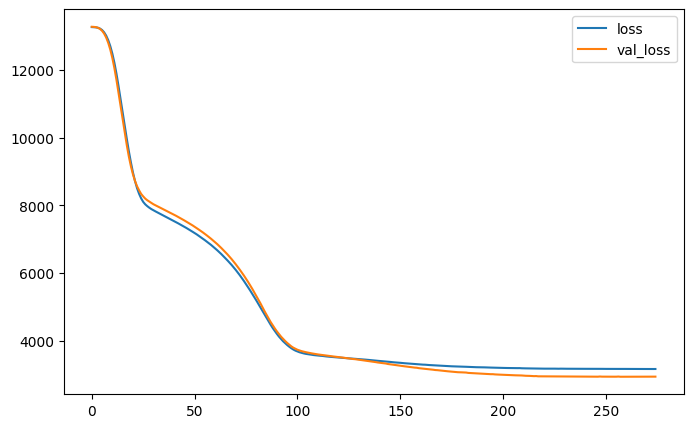

In [29]:
(pd.DataFrame(history_es.history).loc[:, ['loss', 'val_loss']]).plot(figsize=(8, 5))

#### The training stopped when the losses saturated and the model was saved

## Predicting a single Value

In [30]:
x_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
342,60,female,27.550,0,no,northeast
308,58,male,34.865,0,no,northeast
1128,34,male,32.800,1,no,southwest
503,19,male,30.250,0,yes,southeast


In [31]:
x_test.iloc[2]

age                64
sex            female
bmi            26.885
children            0
smoker            yes
region      northwest
Name: 890, dtype: object

In [32]:
pd.DataFrame(x_test.iloc[2])

,890
age,64
sex,female
bmi,26.885
children,0
smoker,yes
region,northwest


In [33]:
x_test.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [34]:
aa = pd.DataFrame(x_test.iloc[2].values.reshape(1,6), columns=x_test.columns)
aa

,age,sex,bmi,children,smoker,region
0,64,female,26.885,0,yes,northwest


In [35]:
ct.transform(aa)

array([[1.        , 0.29391983, 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [36]:
model.predict(ct.transform(aa))

1/1 [==============================] - 0s 32ms/step


array([[32019.658]], dtype=float32)

In [37]:
model_es.predict(ct.transform(aa))

1/1 [==============================] - 0s 48ms/step


array([[46184.27]], dtype=float32)

In [38]:
x_test[:4]

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest


In [39]:
y_test[:4]

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
Name: charges, dtype: float64